In [1]:
# Template to solve any supervised ML Regression problem!
# Readig data in python
# Defining the problem statement
# Identify the target variable
# Looking at the distribution of Target variable
# Basic data exploration
# Rejecting useless columns
# Visual Exploratory Data Analysis for data ditribution
# Outlier treatment
# Missing values treatment
# Visual corrrelation analysis
# Statistical correlation analysis (Feature selection)
# Converting data to numeric for ML
# Sampling and K=fold cross validation
# Trying multiple regression algorithms
# Selecting the best model
# Deploying the best model in production

In [2]:
# The data has one file CarPricesData.csv
# Description
# Price:The price of the car in dollars
# Age: The age of the car in months
# KM: How many KMS did the car was used
# FuelType: Petrol/Diesel/CNG car
# HP: Horse Power of the car
# Metcolor: Whether car has automatic color or not
# Automatic: Whether car has automatic transmission of not
# CC: The engine size of the car
# Doors: The number of doors in the car
# Weight: The weight of the car

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Chinmaya\\IVY Python ML-Oct 2022'

In [6]:
import pandas as pd
import numpy as np

In [7]:
# Reading the dataset
CarPricesData=pd.read_csv('C:/Users/Chinmaya/IVY Python ML-Oct 2022/CarPricesData.csv',encoding='latin')
print('Shape before deleting duplicate values:',CarPricesData.shape)

Shape before deleting duplicate values: (1436, 10)


In [8]:
# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape after deleting duplicate values:',CarPricesData.shape)

Shape after deleting duplicate values: (1435, 10)


In [9]:
# Priting sample data
CarPricesData.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [10]:
# Creating the model
# Target variable:Price
# Predictors: Age, KM, FuelType, CC, etc

In [11]:
# Based on problem statement we need to create a supervised ML Regression model, as the target variable is continuous

In [12]:
# Looking at the distribution of Target variable
# If target variable is too skewed then the predictive modelling is not possible
# Bell curve is desirable but slightely positive skew/negative skew is also fine
# When performing regression, make sure the histogram looks like a bell curve or slight skewed version of it.
# Otherwise it impacts the ML algorithms ability to learn all the scenarios

<AxesSubplot:>

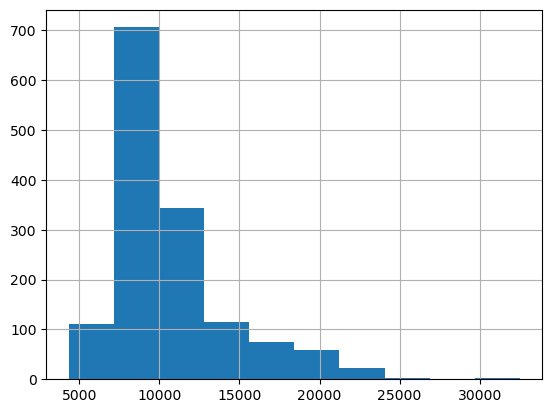

In [13]:
%matplotlib inline
# Creating bar charts as the target variable is continuous
CarPricesData['Price'].hist()
# The data distribution of  the target variable is satisfactory to proceed further. There are sufficient number of rows for
# each type of values to learn from

In [14]:
# Basic data exploration
# This step is performed to gauge the overall data, volume, types of columns
# Initial assessment of the data should be done to identify which columns are Quantitative, Categorical, or Qualitative

# Helps to start the column rejection process
# We need to question if a particular columns affect the target variable?
# If answer is no, then better to remove the column immediately from the data, otherwise eep the column for the further analysis

# 4 commands that are used for Basic data exploration in Python
# head(): helps to see few sample rows of the data
# info(): provides summarized information of the data
# describe(): provides descriptive statistical details of the data
# nunique(): helpsus to identify if a columns is categorical/continuous

In [15]:
CarPricesData.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [16]:
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [17]:
# Looking at the descriptive statistics of the data
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


In [18]:
# Finging unique values for each columns
# To understand which column is categorical and which column is continuous
CarPricesData.nunique()
# Values <20 can be considered as categorical

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [19]:
# Basic Data exploration results
# Price: Continuous-->Selected--Target variable
# Age: Continuous-->Selected
# KM: Continuous-->Selected
# FuelType: Categorical-->Selected
# HP: Categorical-->Selected
# MetColor: Categorical-->Selected
# Automatic: Categorical-->Selected
# CC: Categorical-->Selected
# Doors: Categorical-->Selected
# Weight: Continuous-->Selected

In [20]:
# Removing useless columns
# There are no qualitative columns in this data

In [21]:
# Visual Exploratory Data Analysis
# Category variables: Bar plots
# Continuous variables: Histograms

In [22]:
# Visualize distribution of all the categorical predictor variables in the data using bar plots
# By looking the data, typically a categorical variable contains 20 unique values
# Based on the Basic data exploration, we have spotted 6 categorical predictors in the data

In [23]:
# Categorical predictors
# FuelType, HP, Metcolor, Automatic, CC, Doors
# plotting multiple bar charts at once for categorical variable
# we will be defining out own function

In [24]:
def plotBarCharts (inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # generating multiple subplot
    # subplots is for creating multiple charts at a time
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: ' + str(colsToPlot))
    
    # zipping columns in one go
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

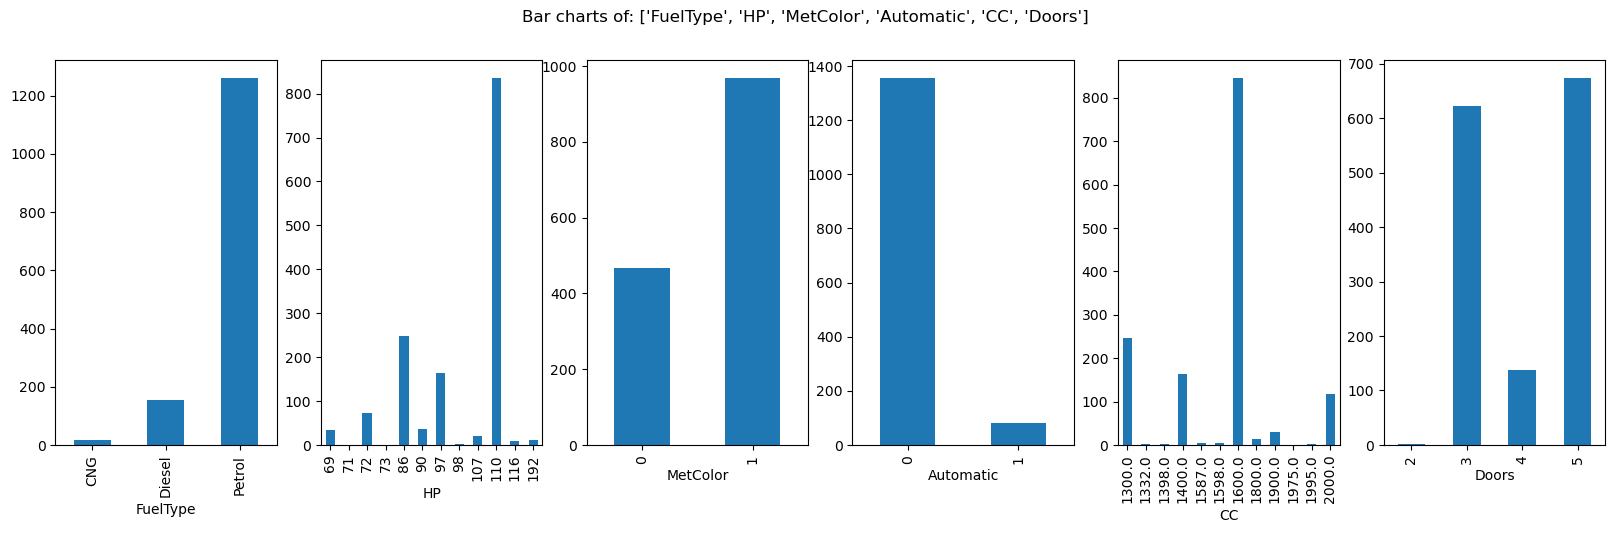

In [25]:
# calling the function
plotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType','HP','MetColor',
                                                 'Automatic','CC','Doors'])

In [26]:
# Bar chart interpretation
# These bar charts represent frequencies of each category in the Y-axis and names in the x-axis
# Each category has comparable frequencies. Hence, there are enough rows for each category in the data for ML algorithm to learn
# If there is a column which are too skewed, those may not be so helpful in machine learning
# This is a correlation analysis section where we can select or reject the column

# Selected categorical variables
# All the variables are selected for further analysis
# 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'

In [27]:
# Visualize distribution of all continuous predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'KM'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

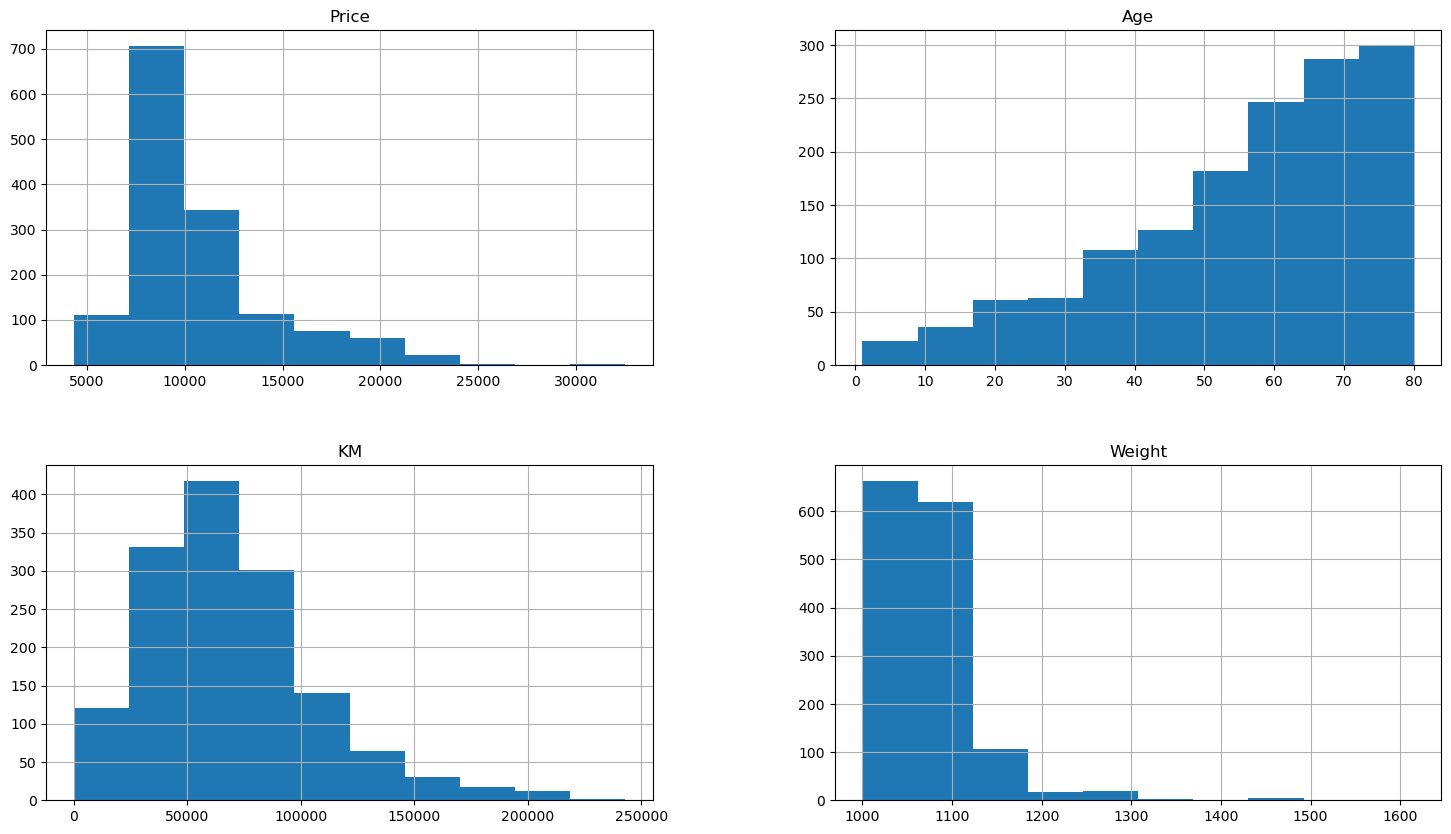

In [28]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Price','Age','KM','Weight'], figsize=(18,10))

In [29]:
# Histogram Interpretation
# Histogram interpretation shows us the data distribution for a single continuous variable
# X-axis shows the range of values and Y-axis represent the number of values in that range. For ex: in the above histogram of
# 'Age', there are around 300 rows in the data that has the value between 70 to 80
# The ideal outcome for histogram is a bell curve or slightely skewed bell curve. If there is too much skewness,
# then outlier treatment should be done and then column should be re-examined or we need to reject the column

In [30]:
# Selected continuous variables
# Price: Selected.The distibution is good. Outliers are seen near 30000, need to treat them
# KM: Selected. The distribution is good.
# Age: Selected. The distribution is good.
# Weight: Selected. The distrbution is good. The outlier beyond 1400, need to treat them

In [31]:
# Outlier treatment
# Outliers are extreme values in the data which are far away from most of the values. You can see them as the tail of histogram
# Outliers must be treated one column at a time.As the treatment will be slightly different for each column

# Why I should treat outliers?

# Outliers bias the machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority
# of the data
# There are below 2 options:
# Opt-1: Delete the outlier records. Only there are just few rows left
# Opt-2: Impute the outlier values with a logical business value
# Below we are finding the most logical value to be replaced in place of outliers by looking at the histogram

In [32]:
# Treating outliers for 'Weight' column

In [33]:
# Counting nummber of rows having outliers
len(CarPricesData['Weight'][CarPricesData['Weight']>1400])

5

In [34]:
# Finding logical values near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

112     1320.0
138     1320.0
115     1280.0
119     1275.0
68      1275.0
         ...  
927     1000.0
1410    1000.0
605     1000.0
1021    1000.0
957     1000.0
Name: Weight, Length: 1428, dtype: float64

In [35]:
# Based on the above output, the nearest logical value is 1320, hence, replacing any value greater than 1400 with it

In [36]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

In [37]:
# Treating outliers for 'Price' column
len(CarPricesData['Price'][CarPricesData['Price']<29000])

1432

In [38]:
CarPricesData['Price'][CarPricesData['Price']<29000].sort_values(ascending=False)

115     24990
112     24950
147     24500
141     23950
171     23750
        ...  
402      5150
192      4750
393      4450
1048     4400
191      4350
Name: Price, Length: 1432, dtype: int64

In [39]:
CarPricesData['Price'][CarPricesData['Price']>29000]=24990

In [40]:
# Visualizing the distribution after outlier treatment
CarPricesData.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Weight'}>]], dtype=object)

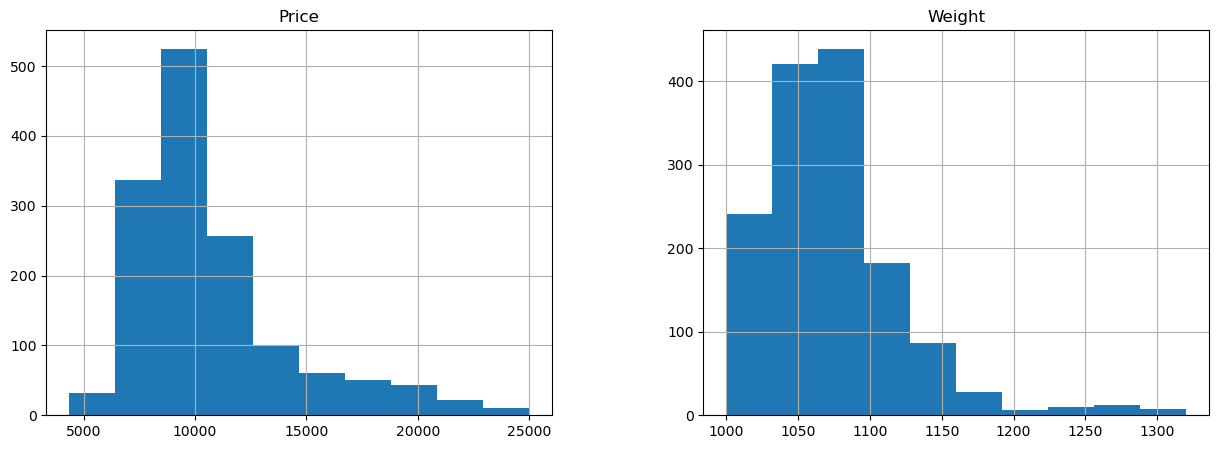

In [41]:
CarPricesData.hist(['Price','Weight'], figsize=(15,5))

In [42]:
# The distribution has been improved. Still there is a tail on the right side, but those are acceptable as it is thick.

In [43]:
# Missing values treatment
# Missing values are treated for each column separately
# If a column has 30% of the data missing, then the missing value treatment cannot be done.
# That column must be rejected because too much of information is missing

In [44]:
# There are below options for treating missing values in the data
# - Interpolate the values based on business logic
# - Impute the missing values with MEDIAN value for contiiuous variables
# - Impute the missing values with MODE value for categorical variables
# - Interpolate the values based on nearby values
# - Delete the missing value rows if there are only few records

In [45]:
# Using business logic of other column
CarPricesData.groupby('FuelType')['CC'].mean()

FuelType
CNG       1599.882353
Diesel    1976.396104
Petrol    1516.058824
Name: CC, dtype: float64

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64


<AxesSubplot:>

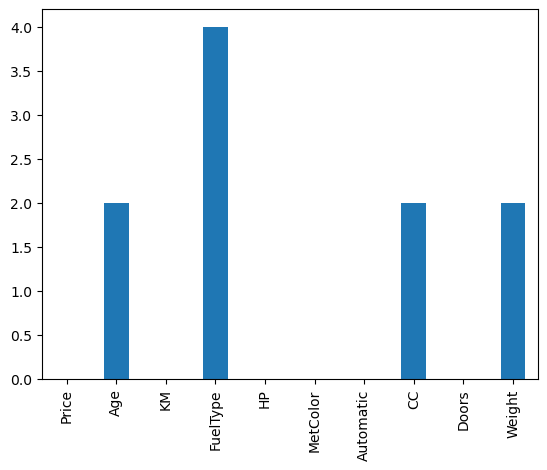

In [46]:
# Finding the missing values are there for each column
print(CarPricesData.isnull().sum())
CarPricesData.isnull().sum().plot(kind='bar') # may not be required

In [47]:
# I am treating missing values with Median for Continuous values and Mode for categorical values

In [48]:
CarPricesData['FuelType'].mode()

0    Petrol
Name: FuelType, dtype: object

In [49]:
CarPricesData['FuelType'].mode()[0]

'Petrol'

In [50]:
CarPricesData['Weight'].median()

1070.0

In [51]:
# Treating missing values of categorical variable with Mode value
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True)

In [52]:
# Treating missing values of continuous variable with Mean value
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True)
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True)

In [53]:
# Printing missing values again after the treatmment
print(CarPricesData.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


In [54]:
# Interpolation
# Don't use it when there is skewness in the data

In [55]:
CarPricesData.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [56]:
# Feature selection (Bi-variate analysis)

In [57]:
# Visual exploration of relationship between variables
# - Continuous v/s continuous--Scatter plot
# - Categorical v/s continuous--Box plot
# - Categorical v/s categorical--Grouped Bar plot

# Statistical measurement of relationship strength between variables
# - Continuous v/s continuous--Correlation matric
# - Categorical v/s continuous--ANOVA Test
# - Categorical v/s categorical--Chi-Square Test

# In case of target variable is continuous, hence below 2 scenarios is present
# - Continuous Target variable v/s Continuous predictor
# - Continuous Target variable v/s Categorical predictor

In [58]:
# Relationship exploration: Continuous v/s continuous
# When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship
# between two variables using scatter plot and measure the strength using pearson's correlation value

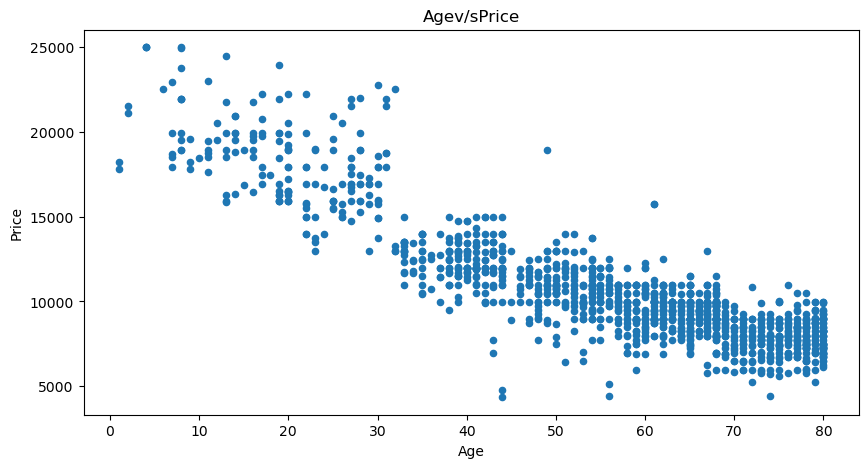

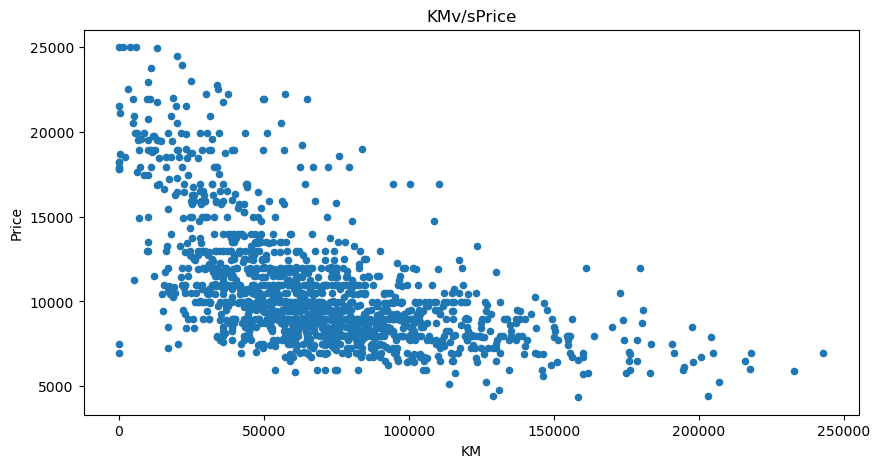

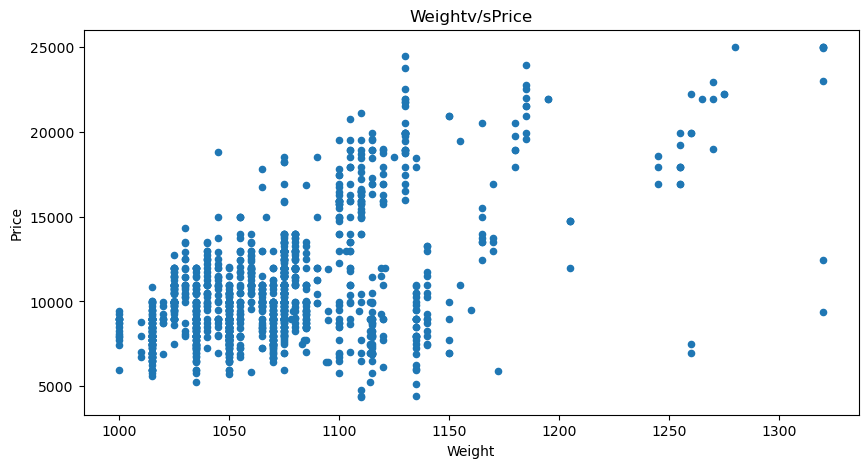

In [59]:
Continuouscols=['Age', 'KM', 'Weight']

for predictor in Continuouscols:
    CarPricesData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor + 'v/s' + 'Price')

In [60]:
# Scatter chart interpretation:
# Trend
# We need to see visible trend. There could be 3 scenarios
# 1. Increasing trend: This means both variables are positively correlated.  In simpler terms they are directly proportional
# to each other. This is good ML
# 2. Decreasing trend: This means both variables are positively correlated.  In simpler terms they are inversely proportional
# to each other. This is also good ML
# 3. No trend: You can't see any clear increasing/decreasing trend. This means there is no correlation between variables.
# Hence predictor can't be used

# Based on the chart you can get good idea about the predictor, if it is useful or not. ou confirm this by looking at the
# correlation value

In [61]:
# Statistical feature selection:
# This value will be calulated only between numeric columns
# Correlation between [-1,0] means inversely proportional, the scatter plot will show downward trend
# Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
# Correlation near [0] means No relationship, the scatter plot will show no clear trend
# If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
# We observe the correlations between Target variable and all other predictor variables(s) to check which 
# columns/features/predictors are actually related to the target variable in question

In [62]:
# Calculating correlation matrix
Continuouscols=['Price','Age', 'KM', 'Weight']

# Creating the correlation matrix
CorrelationData=CarPricesData[Continuouscols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.880043,-0.573402,0.580007
Age,-0.880043,1.000000,0.502604,-0.488324
KM,-0.573402,0.502604,1.000000,-0.013607
Weight,0.580007,-0.488324,-0.013607,1.000000


In [63]:
# Filtering only those columns where absolute correlation>0.5 with Target variable
# Reduce 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price'])>0.5]

Price     1.000000
Age      -0.880043
KM       -0.573402
Weight    0.580007
Name: Price, dtype: float64

In [64]:
# Final selected columns are ['Age', 'KM', 'Weight']

In [65]:
abs(CorrelationData['Price'])>0.5

Price     True
Age       True
KM        True
Weight    True
Name: Price, dtype: bool

In [66]:
# Relationship exploration: Categorical v/s continuous--Box Plots
# When the target variable is continuous and the predictor variable is Categorical, we can analyze the relation using Boxplots
# and measure the strength of relation using ANOVA test

KeyError: 'Metcolor'

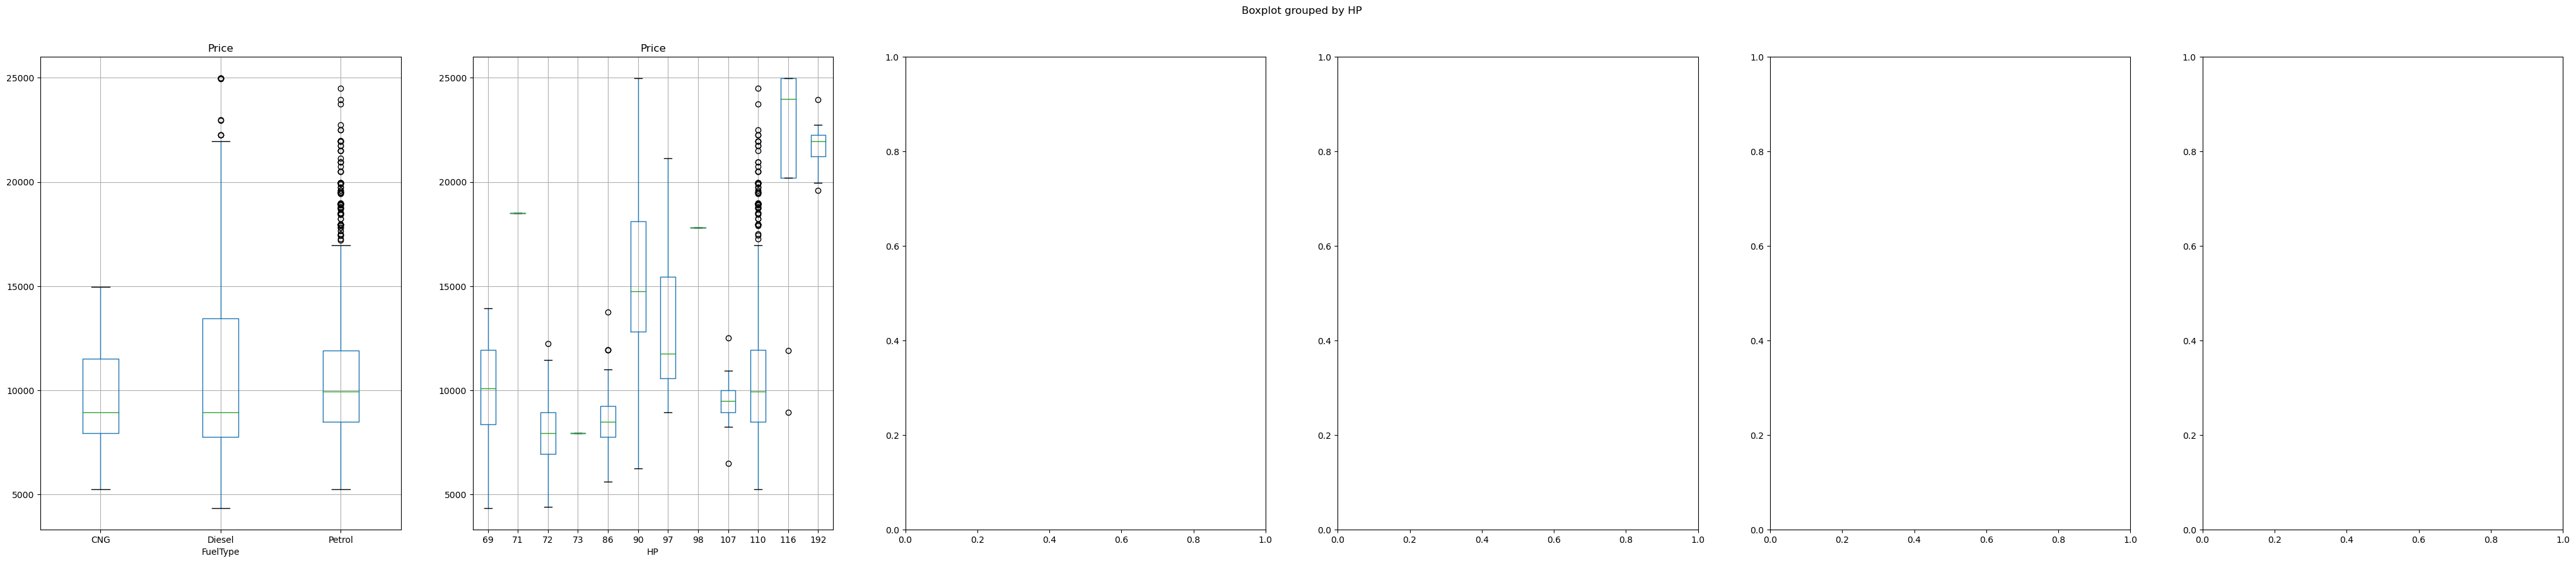

In [67]:
# Box plots for Categorical Target variable 'Price' and Continuous predictors
CategoricalColslist=['FuelType', 'HP', 'Metcolor', 'Automatic', 'CC', 'Doors']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColslist), figsize=(50,10))

# Creating Box plots for each continuous predictor against the Target variable "Price"
for PredictorCol, i in zip(CategoricalColslist, range(len(CategoricalColslist))):
    CarPricesData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [68]:
# Box plot interpretation
# What should you look for in these box plots?
# These plots gives an idea about the data distribution of continuous predictor in the Y-axis 
# for each of the category in the X-Axis

# If tthe distribution looks similar for each category(Boxes are in the same line), that means the continuous variable
# has NO effect on the target variable. Hence the variables are not correlated to each other.

# On the other hand, if the distribution is different for each category (the boxes are not same in-line). It hints that these
# variables might be correlated with 'Price'

In [69]:
# Statistical Feature selection using ANOVA Test(Categorical V/s Continuous) using ANOVA test
# Analysis of variance(ANOVA) is performed to check if there is any relationship between given continuous and categorical variable

# Assumption(H0): There is NO relation between the given variables (i.e., The average(mean) values of the numeric Target variable
# # is same for all the groups in the categorical predictor variable)
# ANOVA Test Result: Probability of H0 being True

In [70]:
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
CategoryGroupLists

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22500, 220...
Name: Price, dtype: object

In [71]:
# Defining the function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selectted predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-value:', AnovaResults[1])
            
    return(SelectedPredictors)

In [73]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors']
FunctionAnova(inpData=CarPricesData,
             TargetVariable='Price',
             CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

FuelType is NOT correlated with Price | P-value: 0.13509668858708382
HP is correlated with Price | P-value: 1.9274014078136855e-103
MetColor is correlated with Price | P-value: 2.9082820205816128e-05
Automatic is NOT correlated with Price | P-value: 0.17860614078485976
CC is correlated with Price | P-value: 4.667580175740994e-49
Doors is correlated with Price | P-value: 1.0200265373934503e-12


['HP', 'MetColor', 'CC', 'Doors']

In [ ]:
# The results of Anova confirm our visual analysis using box plot above
# All categorical variables are correlated with the Target variable except 'FuelType' and 'Automatic'. This is something
# we guessed by looking at the box plots!

# Final selected Categorical columns:
# 'HP', 'MetColor', 'CC', 'Doors'

In [74]:
# Selecting Final predictors for Machine Learning
# Based on the above tests, selecting the final columns for machine learning

In [75]:
SelectedColumns=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

# Selecting Final columns
DataForML=CarPricesData[SelectedColumns]
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [76]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [77]:
import pandas as pd
DataForML.to_pickle('DataForML.pkl')
DataForML.head()

,Age,KM,Weight,HP,MetColor,CC,Doors
0,23.0,46986,1165.0,90,1,2000.0,3
1,23.0,72937,1165.0,90,1,2000.0,3
2,24.0,41711,1165.0,90,1,2000.0,3
3,26.0,48000,1165.0,90,0,2000.0,3
4,30.0,38500,1170.0,90,0,2000.0,3


In [78]:
# Data Pre-processing for Machine Learning
# List of steps performed on predictor variables before data can be used for Machine learning

# 1. Converting each Ordical Categorical columns to numeric
# 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
# 3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
# 4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms
# like KNN, or Neural Networks

# In this data there is no Ordinal categorical variable which is in string format.

In [79]:
# Converting binary nominal variable to numeric using / mapping
# There is no binary nominal variable in string format to be converted

In [80]:
# Converting the nominal variable to numeric using get_dummies()

In [81]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target variable to the data
DataForML_Numeric['Price']=CarPricesData['Price']

# Printing the sample rows
DataForML_Numeric.head(20)

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
5,32.0,61000,1170.0,90,0,2000.0,3,12950
6,27.0,94612,1245.0,90,1,2000.0,3,16900
7,30.0,75889,1245.0,90,1,2000.0,3,18600
8,27.0,19700,1185.0,192,0,1800.0,3,21500
9,23.0,71138,1105.0,69,0,1900.0,3,12950


In [82]:
# Machine Learning: Splitting the data into Training and Testing sample
# We don't uses full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is.
# This is known as Testing dataand the remaining data is called Training data on which the model is built.
# Typically 70% of the data is used as Training data and the rest 30% is used as Testing data.

In [83]:
# Printing all the names for our references
DataForML_Numeric.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [84]:
# Separate Target variable and Target variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

# Simple Linear Regression (only one predictor)
# Predictors=['Age']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=31)

# Quick checck on shapes of train and test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004,)
(431, 7)
(431,)


In [85]:
# Suppressing scientific notation in printing numpy arrays
np.set_printoptions(suppress=True)
X_train[0:10]

array([[    50.,  73634.,   1075.,    110.,      0.,   1587.,      5.],
       [    22.,  37400.,   1110.,     97.,      1.,   1400.,      5.],
       [    37.,  21500.,   1030.,    110.,      1.,   1600.,      5.],
       [    79.,  95700.,   1085.,    110.,      0.,   1600.,      5.],
       [    28.,  28817.,   1130.,    110.,      1.,   1598.,      5.],
       [    78.,  84000.,   1065.,    110.,      1.,   1600.,      5.],
       [    60.,  64914.,   1070.,    110.,      1.,   1600.,      5.],
       [    65., 132807.,   1135.,     72.,      1.,   2000.,      5.],
       [    54., 115046.,   1140.,     69.,      1.,   1900.,      5.],
       [    67.,  77821.,   1075.,    110.,      1.,   1600.,      5.]])

In [86]:
y_train[0:10]

array([10500, 14950, 11450,  6990, 18950,  7250,  8500,  8950, 10500,
       10950], dtype=int64)

In [87]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on training data
LREG=RegModel.fit(X_train, y_train)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring goodness of fit in Training data
print('R2 value:', metrics.r2_score(y_train, LREG.predict(X_train)))

#####################################################################
print('\n#### Model Validation and Accuracy Calculations########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Calculating the error for each row
TestingDataResults['APE']=100*((abs(
    TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable, 'Predicted'+TargetVariable, 'APE']].head())

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be neative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Deining a custom function to calculate accuracy
# Make sure there are no zeroes in the TargetVariable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-fold cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=5, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 value: 0.8771946155052472

#### Model Validation and Accuracy Calculations########
   Price  PredictedPrice        APE
0  17950         15979.0  10.980501
1   7900          9044.0  14.481013
2   7950          7966.0   0.201258
3   8250          6686.0  18.957576
4   9900         10411.0   5.161616
Mean Accuracy on test data: 90.47940835620471
Median Accuracy on test data: 92.83417085427136

Accuracy values for 10-fold Cross Validation:
 [85.06196301 90.10317148 90.61854364 89.58519462 89.36321955]

Final Average Accuracy of the model: 88.95


In [ ]:
100 * (abs(9837.0 - 8950)/8950)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [ ]:
TestingDataResults['PriceAVG']=TestingDataResults['Price'].mean()
TestingDataResults.head()

KeyError: 'PriceAVG'

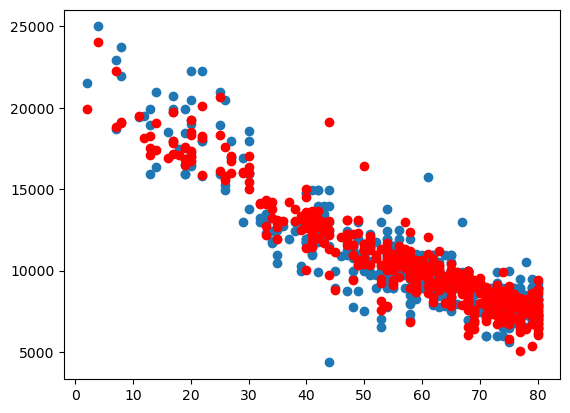

In [88]:
# Visualizing the line of best fit
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['Age'], y=TestingDataResults['Price'])
plt.scatter(TestingDataResults['Age'], TestingDataResults['PredictedPrice'], color='red')
plt.plot(TestingDataResults['Age'], TestingDataResults['PriceAVG'], color='green')

In [ ]:
SelectedColumns=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

In [89]:
# Looking at the co-efficients for each column
LREG.coef_

array([-115.70648793,   -0.0169615 ,   27.95882351,   35.23606557,
        135.32192259,   -2.64171187,  -88.91412854])

In [90]:
# Looking at the intercept
LREG.intercept_

-10784.495663543892

In [91]:
# SLR Equation
# Price=-169.33(Age)+20211.62

In [92]:
# MLR Equation
# Price=-120.06(Age)-0.0015(KM).....-7266

In [93]:
# Decision Trees

DecisionTreeRegressor(criterion='mse', max_depth=3)
R2 value: 0.8647551094793858

##### Model Validation and Accuracy Calculations ###########
   Price  PredictedPrice
0  17950         16469.0
1   7900          9374.0
2   7950          7884.0
3   8250          7884.0
4   9900          9374.0
Mean Accuracy on test data: 92.75294117647059

Accuracy values for 10-fold Cross Validation:
 [83.83497421 87.54092648 86.11810534 86.07782878 86.58615835 90.54523664
 91.78645028 85.63224193 91.26690628 89.39986216]

Final Average Accuracy of the model: 87.88


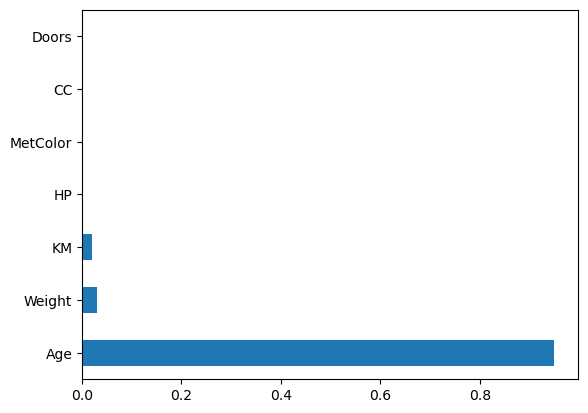

In [101]:
# Decision Trees (Multiple If-else statements)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3, criterion='mse')
# Good range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on training data
DT=RegModel.fit(X_train, y_train)

from sklearn import metrics
# Measuring goodness of fit in Training Data
print('R2 value:', metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

############################################################################
print('\n##### Model Validation and Accuracy Calculations ###########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing some sample prediction values
print(TestingDataResults[[TargetVariable, 'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianAPE=np.median(TestingDataResults['APE'])

Accuracy=100 - MAPE
MedianAccuracy=100 - MedianAPE
print('Mean Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeroes in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return (100-MAPE)

# Custom Scoring MAPE calulation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [102]:
# Plotting a Decision Tree
# Installing the required library for plotting the decision tree
# Make sure to run all 3 commands
# 1. Open Anaconda Prompt/people with mac run on terminal
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [103]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ['PATH'] +=os.pathsep + 'C:/Users/Chinmaya/anaconda3/pkgs/graphviz-2.50.0-hdb8b0d4_0/Library/bin'

In [104]:
np.var(y_train)

12679025.103858469

In [105]:
np.mean(y_train)

10709.526892430278

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Age <= 32.5\nmse = 12679025.104\nsamples = 1004\nvalue = 10709.527"] ;
1 [label="Weight <= 1182.5\nmse = 7277547.738\nsamples = 129\nvalue = 18246.806"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= 16.5\nmse = 4600865.564\nsamples = 105\nvalue = 17479.695"] ;
1 -> 2 ;
3 [label="mse = 3062406.325\nsamples = 38\nvalue = 19261.132"] ;
2 -> 3 ;
4 [label="mse = 2652679.027\nsamples = 67\nvalue = 16469.328"] ;
2 -> 4 ;
5 [label="KM <= 65974.0\nmse = 5150045.66\nsamples = 24\nvalue = 21602.917"] ;
1 -> 5 ;
6 [label="mse = 2894329.0\nsamples = 20\nvalue = 22331.0"] ;
5 -> 6 ;
7 [label="mse = 525468.75\nsamples = 4\nvalue = 17962.5"] ;
5 -> 7 ;
8 [label="Age <= 55.5\nmse = 3865066.257\nsamples = 875\nvalue = 9598.317"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="KM <= 124767.5\nmse = 2564829.81\nsamples = 272\nvalue = 11569.831"] ;
8

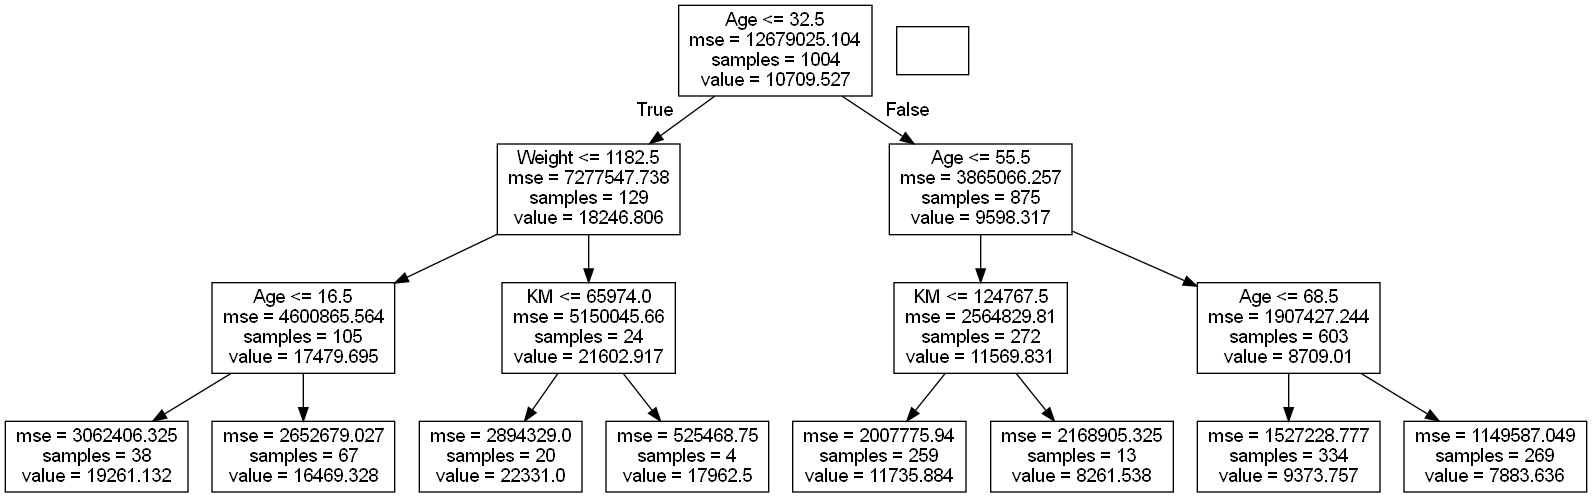

In [106]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                               feature_names=Predictors, class_names=TargetVariable)

# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=8000, height=8000)

# Double click on the graph to zoom-in

In [107]:
# Saving the figure in current working directory
import matplotlib.pyplot as plt
currentFig=plt.gcf()
currentFig.savefig('DecisionTree.JPEG')

<Figure size 640x480 with 0 Axes>